<a href="https://colab.research.google.com/github/NervOUs11/Fruits_and_Vegetables/blob/main/FruitAndVegetable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D 

In [ ]:
!pip install kaggle

In [7]:
#Configuring the path of kaggle.json file
#  !!!!! Upload kaggle.json first !!!!!

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
#Download dataset from kaggle
!kaggle datasets download -d moltean/fruits

 99% 1.27G/1.28G [00:10<00:00, 197MB/s]
100% 1.28G/1.28G [00:10<00:00, 131MB/s]


In [9]:
#Extract the zip file
dataset = '/content/fruits.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall() 

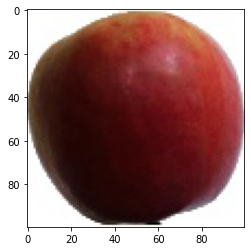

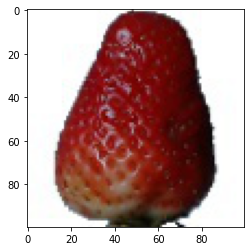

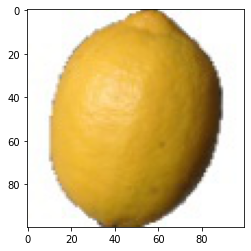

In [10]:
#Show fruits images
img1 = plt.imread('/content/fruits-360_dataset/fruits-360/Training/Apple Crimson Snow/0_100.jpg')
imgplt1 = plt.imshow(img1)
plt.show()

img2 = plt.imread('/content/fruits-360_dataset/fruits-360/Training/Strawberry/0_100.jpg')
imgplt2 = plt.imshow(img2)
plt.show()

img3 = plt.imread('/content/fruits-360_dataset/fruits-360/Training/Lemon/0_100.jpg')
imgplt3 = plt.imshow(img3)
plt.show()

In [11]:
#Prepare dataset 
train_dir = '/content/fruits-360_dataset/fruits-360/Training'
test_dir = '/content/fruits-360_dataset/fruits-360/Test'
batch_size = 80
height, width = 100, 100

train_data = ImageDataGenerator(
              rescale=1/255,
              rotation_range=50,
              width_shift_range=0.2,
              height_shift_range=0.2,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)
test_data = ImageDataGenerator(rescale=1/255)

train_data = train_data.flow_from_directory(
    train_dir,
    target_size=(height,width),
    batch_size=batch_size,
    class_mode='categorical'
)
test_data = test_data.flow_from_directory(
    test_dir,
    target_size=(height,width),
    class_mode='categorical'
)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [12]:
fruits_dic = train_data.class_indices
fruits_dic

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

In [ ]:
#Number of images
count_train_data = len([name for name in os.listdir('/content/fruits-360_dataset/fruits-360/Training')
                        for name in os.listdir('/content/fruits-360_dataset/fruits-360/Training/' + name)]) #67692

count_test_data = len([name for name in os.listdir('/content/fruits-360_dataset/fruits-360/Test')
                        for name in os.listdir('/content/fruits-360_dataset/fruits-360/Test/' + name)]) #22688

In [13]:
#Build model
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(131, activation='softmax'))

#Show model parameter
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense (Dense)               (None, 32)                5

In [14]:
#Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [32]:
#Train model
epochs = 10
history = model.fit(train_data, steps_per_epoch = 200, epochs = epochs, 
                    validation_data=test_data)

Epoch 1/10
200/200 [==============================] - 423s 2s/step - loss: 4.1031 - accuracy: 0.0689 - val_loss: 2.9082 - val_accuracy: 0.2289
Epoch 2/10
200/200 [==============================] - 418s 2s/step - loss: 2.5736 - accuracy: 0.2828 - val_loss: 1.6415 - val_accuracy: 0.5488
Epoch 3/10
200/200 [==============================] - 417s 2s/step - loss: 1.9173 - accuracy: 0.4381 - val_loss: 1.1195 - val_accuracy: 0.6744
Epoch 4/10
200/200 [==============================] - 414s 2s/step - loss: 1.5341 - accuracy: 0.5371 - val_loss: 0.9282 - val_accuracy: 0.7494
Epoch 5/10
200/200 [==============================] - 416s 2s/step - loss: 1.3459 - accuracy: 0.5896 - val_loss: 0.8122 - val_accuracy: 0.7741
Epoch 6/10
200/200 [==============================] - 416s 2s/step - loss: 1.2095 - accuracy: 0.6285 - val_loss: 0.7361 - val_accuracy: 0.7882
Epoch 7/10
200/200 [==============================] - 413s 2s/step - loss: 1.1330 - accuracy: 0.6438 - val_loss: 0.6869 - val_accuracy: 0.7943

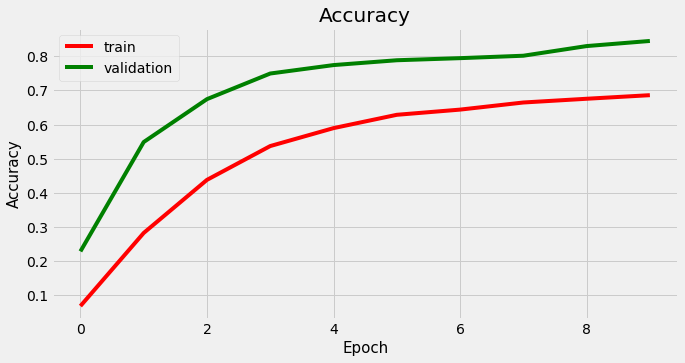

In [34]:
#Show accuracy
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
plt.plot(history.history['accuracy'], color='red',label='train')
plt.plot(history.history['val_accuracy'], color='green',label='validation')
plt.title('Accuracy')
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.legend()
plt.show()

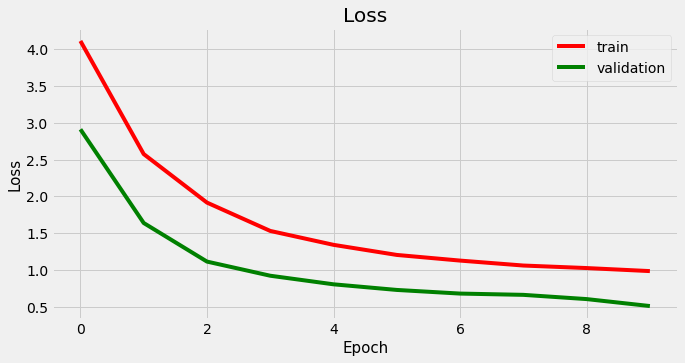

In [35]:
#Show loss
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
plt.plot(history.history['loss'], color='red',label='train')
plt.plot(history.history['val_loss'], color='green',label='validation')
plt.title('Loss')
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.legend()
plt.show()

In [46]:
#Save model
model.save('my_model.h5')

In [45]:
#Load model
model = load_model('my_model.h5')

Saving banana.jpeg to banana.jpeg
Saving blueberry.webp to blueberry.webp
Saving lemon.jpeg to lemon.jpeg


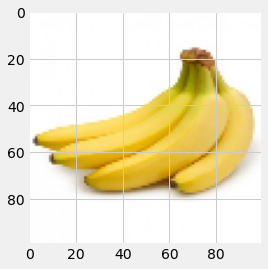

1/1 [==============================] - 0s 24ms/step
Carambula
------------------


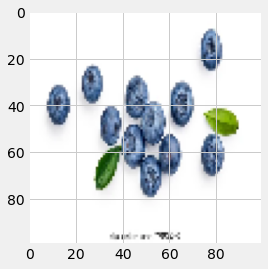

1/1 [==============================] - 0s 24ms/step
Pear 2
------------------


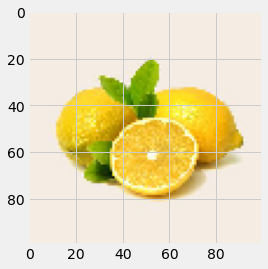

1/1 [==============================] - 0s 27ms/step
Quince
------------------


In [53]:
#Test 
import numpy as np
from google.colab import files
from keras.utils import load_img, img_to_array

uploaded = files.upload()

for k in uploaded.keys():
 
  path = '/content/' + k
  img = load_img(path, target_size=(100, 100))

  imgplt = plt.imshow(img)
  plt.show()

  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image = np.vstack([x])
  classes = model.predict(image)

  for i in fruits_dic:
    if np.argmax(classes) == fruits_dic[i]:
      print(i)
      print('------------------')